<a href="https://colab.research.google.com/github/ismailsangu/IE423-TASK/blob/main/Task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Image Classification of Clothes:


## Initialize

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dfMFT = pd.read_csv('/content/drive/MyDrive/Data_Sets/mnist_fashion_train.csv')
dfMFT.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,33,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dfMFT.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,4.500000,0.000800,0.005783,0.030083,0.103800,0.249683,0.414717,0.821667,2.224733,5.698667,...,34.564367,23.208633,16.576250,17.831967,22.918850,17.916900,8.485717,2.706333,0.819000,0.070883
std,2.872305,0.092554,0.249033,0.767868,2.512017,4.331376,5.827394,8.309935,14.201820,23.835980,...,57.557779,48.881430,42.044318,43.911297,51.928401,45.173634,29.448614,17.258682,9.133252,2.075829
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,57.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,16.000000,36.000000,119.000000,164.000000,224.000000,230.000000,221.000000,221.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.000000


In [ ]:
# Define target and features

y = dfMFT['label'].ravel()
X = scale(dfMFT.drop(['label'], axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=1)

## Analyze Data

Handwriting 				 Label
AxesImage(size=(28, 28)) 		 9


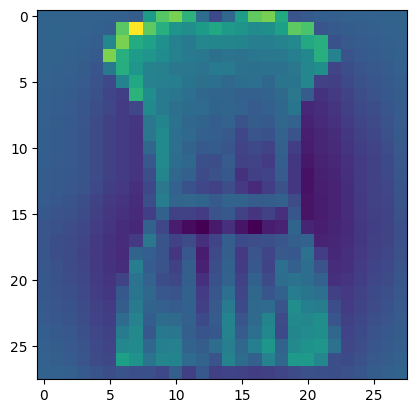

In [ ]:
# Display first image
print('Handwriting', '\t\t\t\t', 'Label')
print(plt.imshow(X[3].reshape((28,28))), '\t\t', y[0])

<Axes: ylabel='count'>

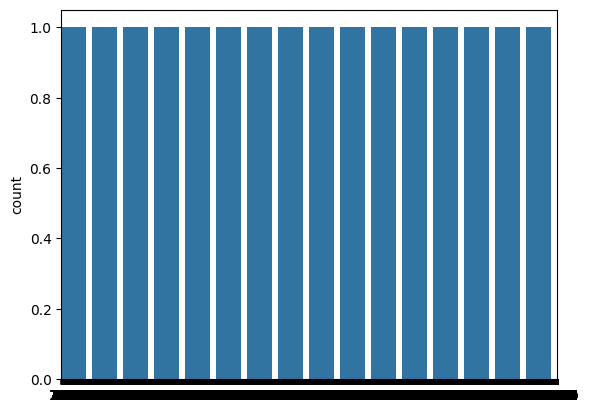

In [ ]:
# Plot count of digit types
sns.countplot(y)

The data set seems weel-balanced. We dont need rebalance it.

## Predict Digit from Handwriting
Since **SVM** is a tool we already know, let's start with that.

In [ ]:
%%time

# Build Support Vector Machines - Classifier model
from sklearn.svm import SVC

mdlSvmMFT = SVC()
mdlSvmMFT.fit(X_train, y_train)
y_test_pred = mdlSvmMFT.predict(X_test)

print ('Classification Report (Support Vector Classifier):')
print (classification_report(y_test, y_test_pred))

Classification Report (Support Vector Classifier):
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1166
           1       0.99      0.98      0.98      1213
           2       0.83      0.81      0.82      1232
           3       0.88      0.90      0.89      1209
           4       0.80      0.85      0.83      1159
           5       0.97      0.95      0.96      1217
           6       0.74      0.66      0.70      1178
           7       0.93      0.96      0.95      1215
           8       0.95      0.97      0.96      1178
           9       0.96      0.94      0.95      1233

    accuracy                           0.89     12000
   macro avg       0.89      0.89      0.89     12000
weighted avg       0.89      0.89      0.89     12000

CPU times: user 10min 19s, sys: 2.56 s, total: 10min 22s
Wall time: 10min 32s


While Support Vector Machines create a boundary that maximize the margin between the different classes, it takes a very long time.  Let's attempt a different way of solving this perhaps by mimicing the way we classify images in our brain...

In [12]:
%%time

# Build Neural Network - Multi-Layer Perceptron
from sklearn.neural_network import MLPClassifier
mdlNncMFT = MLPClassifier()
mdlNncMFT.fit(X_train, y_train)
y_test_pred = mdlNncMFT.predict(X_test)

print ('Classification Report (Neural Network):')
print (classification_report(y_test, y_test_pred))

Classification Report (Neural Network):
              precision    recall  f1-score   support

           0       0.81      0.84      0.83      1166
           1       0.98      0.98      0.98      1213
           2       0.81      0.79      0.80      1232
           3       0.90      0.89      0.89      1209
           4       0.79      0.84      0.82      1159
           5       0.96      0.96      0.96      1217
           6       0.72      0.68      0.70      1178
           7       0.94      0.94      0.94      1215
           8       0.97      0.95      0.96      1178
           9       0.95      0.95      0.95      1233

    accuracy                           0.88     12000
   macro avg       0.88      0.88      0.88     12000
weighted avg       0.88      0.88      0.88     12000

CPU times: user 5min 2s, sys: 2min 10s, total: 7min 13s
Wall time: 5min 33s


Notice the Neural Network took a lot less time to get a more accurate result.  Now, let's see how this performs on data it has never seen before...

In [13]:
# Load Data for Scoring
X_score = scale(pd.read_csv('/content/drive/MyDrive/Data_Sets/mnist_fashion_test.csv'))

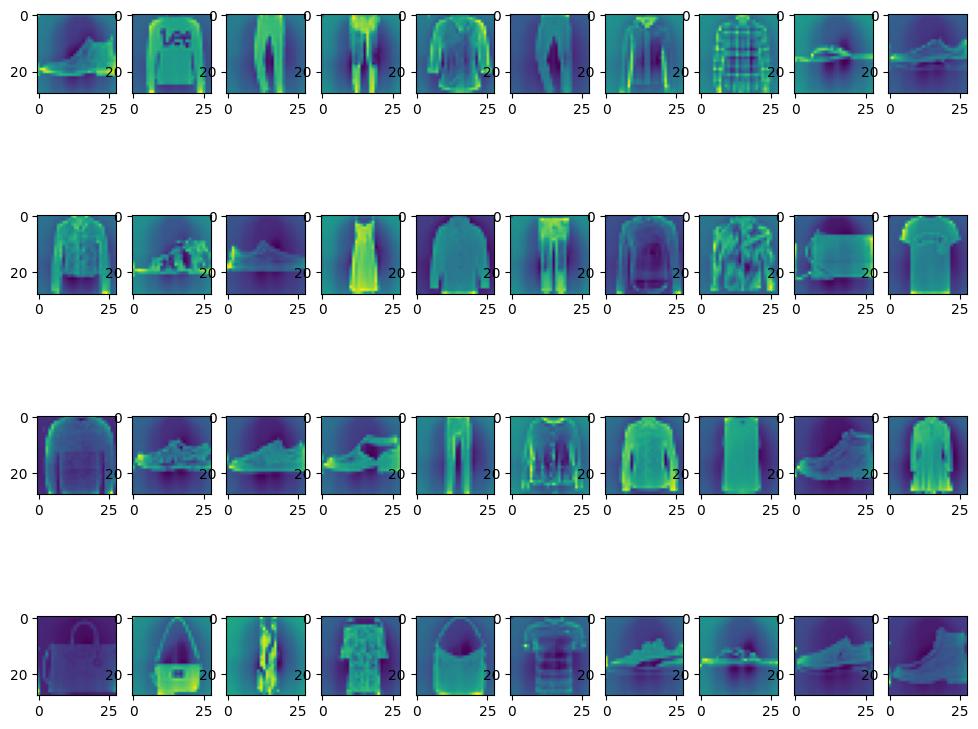

In [15]:
# View New Handwritten Images
plt.figure(figsize=(12,10))
col, row = 10, 4
for i in range(col*row):
    plt.subplot(row, col, i+1)
    plt.imshow(X_score[i][:784].reshape((28,28)))
plt.show()

In [18]:
# Load Data for Scoring, remove extra column if present
X_score = scale(pd.read_csv('/content/drive/MyDrive/Data_Sets/mnist_fashion_test.csv'))
if X_score.shape[1] > 784:
    X_score = X_score[:, :-1]  # Remove the last column

# View New Handwritten Images
# ... (rest of the code remains the same)

# Show predicted digits
print('Predicted Digits (Neural Network):')
for i in range(col*row):
    if np.mod(i,col) == 0:
        print('\n')
    print(mdlNncMFT.predict(X_score[i].reshape(1,-1))[0], end=' ') # Reshape input for single prediction

Predicted Digits (Neural Network):


9 2 1 1 6 1 2 6 5 7 

4 5 7 3 2 0 4 3 8 6 

0 7 7 5 1 2 6 6 9 4 

8 8 1 3 8 0 7 5 7 9 

Let's see if this result can be further improved by tweaking the network...

utexas_ds_orie_divider_gray.png

### Deep Neural Network

Adding additional hidden layers in between the input and output layers could improve the solution.  Such models are known as **Deep Neural Network** models.

In [19]:
%%time

# Build Deep Neural Network - Additional Hidden Layers
from sklearn.neural_network import MLPClassifier
mdlDncMFT = MLPClassifier(hidden_layer_sizes=(100,100))
mdlDncMFT.fit(X_train, y_train)
y_test_pred = mdlDncMFT.predict(X_test)

print ('Classification Report (Deep Neural Network):')
print (classification_report(y_test, y_test_pred))

Classification Report (Deep Neural Network):
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1166
           1       0.99      0.98      0.98      1213
           2       0.82      0.80      0.81      1232
           3       0.89      0.91      0.90      1209
           4       0.82      0.83      0.83      1159
           5       0.95      0.97      0.96      1217
           6       0.75      0.67      0.71      1178
           7       0.94      0.94      0.94      1215
           8       0.96      0.97      0.96      1178
           9       0.96      0.94      0.95      1233

    accuracy                           0.89     12000
   macro avg       0.89      0.89      0.89     12000
weighted avg       0.89      0.89      0.89     12000

CPU times: user 2min 54s, sys: 1min 13s, total: 4min 8s
Wall time: 2min 52s


### Cross Validation

In [20]:
# Cross-validate model across 5 different experiments
from sklearn.model_selection import cross_val_score
cross_val_score(mdlDncMFT, X, y, cv=5)

array([0.88325   , 0.8895    , 0.89033333, 0.88891667, 0.88458333])

## CONCLUSION
* After the control of data and balance of each sample, to decrease the classification duration, *Neural Networks* was succesfully used instead of Support Vector Machine.
* Improved the solution by adding more hidden layers -*Deep Neural Networks*-
* Evaluated the model across multiple experiments via *Cross-Validation*